In [ ]:
!pip install jieba
!pip install wordcloud

In [1]:
# Import necessary libraries
from IPython import display
import math
from pprint import pprint
import pandas as pd
import datetime
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer as SIA
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
nltk.download('vader_lexicon')

# Initialise the Sentiment Intensity Analyzer
sia = SIA()

results = []

D:\ANACONDA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gjc53\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import praw

# Authenticate Reddit API
reddit = praw.Reddit(client_id='T4T27BDBzH0g4f6EDjgfpg',
                     client_secret='66P3ZlZK-3mKH9sTsZSjx4jvMtCIdA',
                     user_agent='Group6')

In [3]:
# Specify the subreddits to scrape
subreddit = reddit.subreddit('Artificial+ArtificialInteligence+Singularity+robotics+SoraAi+Technology+generativeAI+SunoAI+NovelAi+CharacterAI+OpenAI+ChatGPT')

# Get new posts from specified subreddits
new_posts = subreddit.new(limit=None)
new_posts

In [4]:
posts_data = []

# Iterate through each post and extract relevant data
for submission in new_posts:
    
     title = submission.title
     created_utc = datetime.datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d')
     
     sentiment_score = sia.polarity_scores(title)
     
     posts_data.append({
         'Date':created_utc,
         'title':title,
         'neg':sentiment_score['neg'],
         'neu':sentiment_score['neu'],
         'pos':sentiment_score['pos'],
         'sentiment': sentiment_score['compound']
     })

# Convert posts data to DataFrame and save
posts_df = pd.DataFrame(posts_data)
posts_df.to_csv('Cnew_titles.csv')

In [5]:
posts_df

,Date,title,neg,neu,pos,sentiment
0,2024-04-30,Is Google Cloud education subscription worth it?,0.00,0.759,0.241,0.2263
1,2024-04-30,Characters being stupid,0.63,0.370,0.000,-0.5267
2,2024-04-30,The ultimate gamble,0.00,1.000,0.000,0.0000
3,2024-04-30,1950s Simpsons in real life.,0.00,1.000,0.000,0.0000
4,2024-04-30,Free LLM for Custom Interview Preparation App,0.00,0.645,0.355,0.5106
...,...,...,...,...,...,...
10229,2023-06-16,Too many AI tools nowadays...,0.00,1.000,0.000,0.0000
10230,2023-06-15,ChatGPT on internal data,0.00,1.000,0.000,0.0000
10231,2023-06-15,Prompt library for games in ChatGPT,0.00,1.000,0.000,0.0000
10232,2023-06-15,"Webinar ""Unlocking Data Value with Large Langu...",0.00,0.745,0.255,0.3400


In [6]:
df = pd.DataFrame.from_records(posts_data)
df

,Date,title,neg,neu,pos,sentiment
0,2024-04-30,Is Google Cloud education subscription worth it?,0.00,0.759,0.241,0.2263
1,2024-04-30,Characters being stupid,0.63,0.370,0.000,-0.5267
2,2024-04-30,The ultimate gamble,0.00,1.000,0.000,0.0000
3,2024-04-30,1950s Simpsons in real life.,0.00,1.000,0.000,0.0000
4,2024-04-30,Free LLM for Custom Interview Preparation App,0.00,0.645,0.355,0.5106
...,...,...,...,...,...,...
10229,2023-06-16,Too many AI tools nowadays...,0.00,1.000,0.000,0.0000
10230,2023-06-15,ChatGPT on internal data,0.00,1.000,0.000,0.0000
10231,2023-06-15,Prompt library for games in ChatGPT,0.00,1.000,0.000,0.0000
10232,2023-06-15,"Webinar ""Unlocking Data Value with Large Langu...",0.00,0.745,0.255,0.3400


In [7]:
# Assign labels to sentiments
df['label'] = 0
df.loc[df['sentiment'] > 0.2, 'label'] = 1
df.loc[df['sentiment'] < -0.2, 'label'] = -1
df

,Date,title,neg,neu,pos,sentiment,label
0,2024-04-30,Is Google Cloud education subscription worth it?,0.00,0.759,0.241,0.2263,1
1,2024-04-30,Characters being stupid,0.63,0.370,0.000,-0.5267,-1
2,2024-04-30,The ultimate gamble,0.00,1.000,0.000,0.0000,0
3,2024-04-30,1950s Simpsons in real life.,0.00,1.000,0.000,0.0000,0
4,2024-04-30,Free LLM for Custom Interview Preparation App,0.00,0.645,0.355,0.5106,1
...,...,...,...,...,...,...,...
10229,2023-06-16,Too many AI tools nowadays...,0.00,1.000,0.000,0.0000,0
10230,2023-06-15,ChatGPT on internal data,0.00,1.000,0.000,0.0000,0
10231,2023-06-15,Prompt library for games in ChatGPT,0.00,1.000,0.000,0.0000,0
10232,2023-06-15,"Webinar ""Unlocking Data Value with Large Langu...",0.00,0.745,0.255,0.3400,1


In [8]:
# Save labeled DataFrame to CSV
df2 = df[['title', 'label']]
df2.to_csv('reddit_title_labels.csv', mode='a', encoding='utf-8', index=False)

In [9]:
# Print positive and negative headlines
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].title)[:5], width=200)
 
print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].title)[:5], width=200)

Positive headlines:

['Is Google Cloud education subscription worth it?',
 'Free LLM for Custom Interview Preparation App',
 'Phone Keyboard Exploits Leave 1 Billion Users Exposed | Popular Chinese-language keyboard apps reveal leaky security standards',
 'Smarter social media algorithms are going to rule the Web.',
 'Bacterial enzyme strips away blood types to create universal donor blood']

Negative headlines:

['Characters being stupid ',
 'Roleplaying goes wrong',
 'is it just me or have the ai’s got worse memory?',
 'Devs have finally fixed some of the bots that have disappeared from the app?',
 'I told him to eat a banana like a Death Note parody']


In [10]:
# Print value counts and percentages of labels
print(df.label.value_counts())
 
print(df.label.value_counts(normalize=True) * 100)

label
 0    6359
 1    2606
-1    1269
Name: count, dtype: int64
label
 0    62.136017
 1    25.464139
-1    12.399844
Name: proportion, dtype: float64


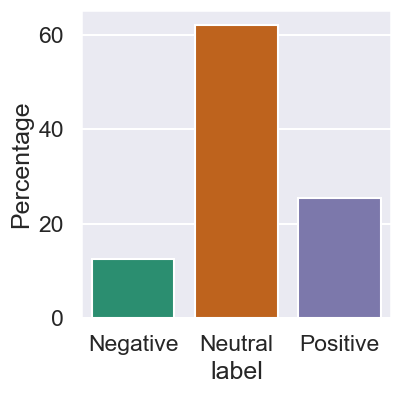

In [11]:
# Plot bar chart of sentiment distribution
fig, ax = plt.subplots(figsize=(4, 4))
 
counts = df.label.value_counts(normalize=True) * 100
 
sns.barplot(x=counts.index, y=counts, ax=ax)
 
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
 
plt.show()

In [25]:
# Tokenise text and remove stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('punkt')
tokenizer = RegexpTokenizer(r'\w+')

nltk.download('stopwords')
stop_words = stopwords.words('english')


print(stop_words[:20])

# Add more stop words
additional_stop_words = ['like', 'new', 'best', 'better', 'good', 'one', 'using', 'need', 'us', 
                         'says', 'bad', '1', '2', '3', '4', '5', 'could', 'first', 'problem', 
                         'make', 'made', 'use', 'way', 'can', 'would', 'get', 'anyone', 'think', 
                         'work', 'open', 'people', 'help', 'easy', 'hard', 'problem', 'right', 'wrong', 'get', 'getting',
                         'got', 'say', 'create', 'even', 'please']

stop_words.extend(additional_stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gjc53\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gjc53\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Process text data
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [16]:
# Process positive headlines
pos_lines = list(df[df.label == 1].title)
 
pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)
 
pos_freq.most_common(20)

pos_freq_table = pd.DataFrame(pos_freq.most_common(20), columns=['Word', 'Frequency'])
print(pos_freq_table)

            Word  Frequency
0             ai        851
1        chatgpt        133
2            gpt        102
3           free         93
4          video         89
5   intelligence         88
6     generative         85
7         openai         82
8         models         67
9          image         65
10    artificial         63
11          text         63
12         robot         60
13        prompt         59
14          tool         58
15          sora         55
16           llm         53
17          song         53
18         model         53
19          data         52


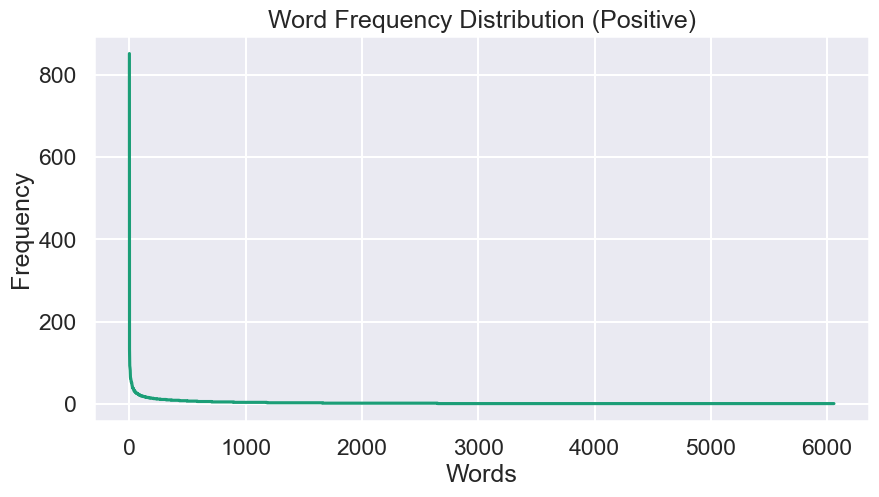

In [17]:
# Plot word frequency distribution for positive headlines
y_val = [x[1] for x in pos_freq.most_common()]
 
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
 
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

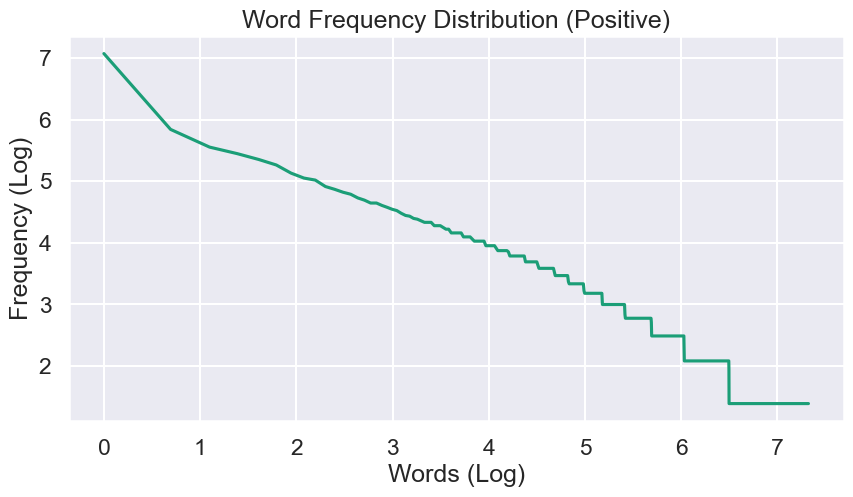

In [18]:
# Plot word frequency distribution for positive headlines using Log
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))
 
x_val = [math.log(i + 1) for i in range(len(y_final))]
 
fig = plt.figure(figsize=(10,5))
 
plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [21]:
# Process negative headlines
neg_lines = list(df2[df2.label == -1].title)
 
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)
 
neg_freq.most_common(20)


neg_freq_table = pd.DataFrame(neg_freq.most_common(20), columns=['Word', 'Frequency'])
print(neg_freq_table)

# Merge the two DataFrames
merged_table = pd.concat([neg_freq_table, pos_freq_table], axis=1, keys=['Negative', 'Positive'])

print(merged_table)

merged_table.to_csv('merged_table.csv', mode='a', encoding='utf-8', index=False)

         Word  Frequency
0          ai        354
1     chatgpt         56
2      openai         45
3         gpt         34
4      google         31
5       error         28
6        meta         27
7     discord         25
8       apple         24
9        suno         23
10      image         23
11      robot         22
12       stop         21
13       else         20
14       data         20
15       song         20
16       bots         19
17      china         19
18       rock         19
19  generated         19
     Negative                Positive          
         Word Frequency          Word Frequency
0          ai       354            ai       851
1     chatgpt        56       chatgpt       133
2      openai        45           gpt       102
3         gpt        34          free        93
4      google        31         video        89
5       error        28  intelligence        88
6        meta        27    generative        85
7     discord        25        openai      

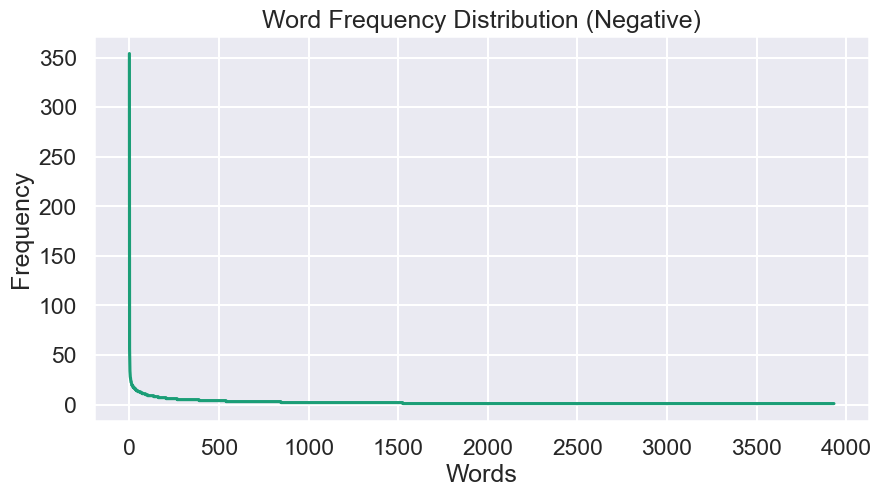

In [22]:
# Plot word frequency distribution for negative headlines
y_val = [x[1] for x in neg_freq.most_common()]
 
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
 
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

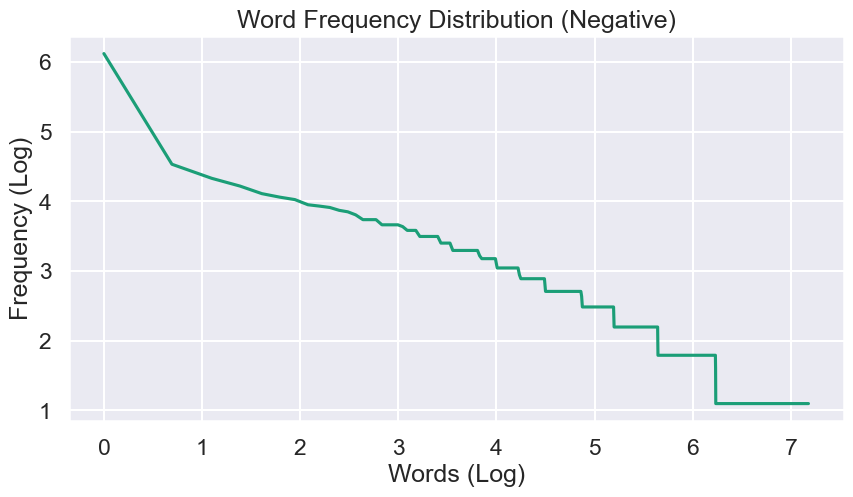

In [23]:
# Plot word frequency distribution for negative headlines using Log
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))
 
x_val = [math.log(i+1) for i in range(len(y_final))]
 
fig = plt.figure(figsize=(10,5))
 
plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

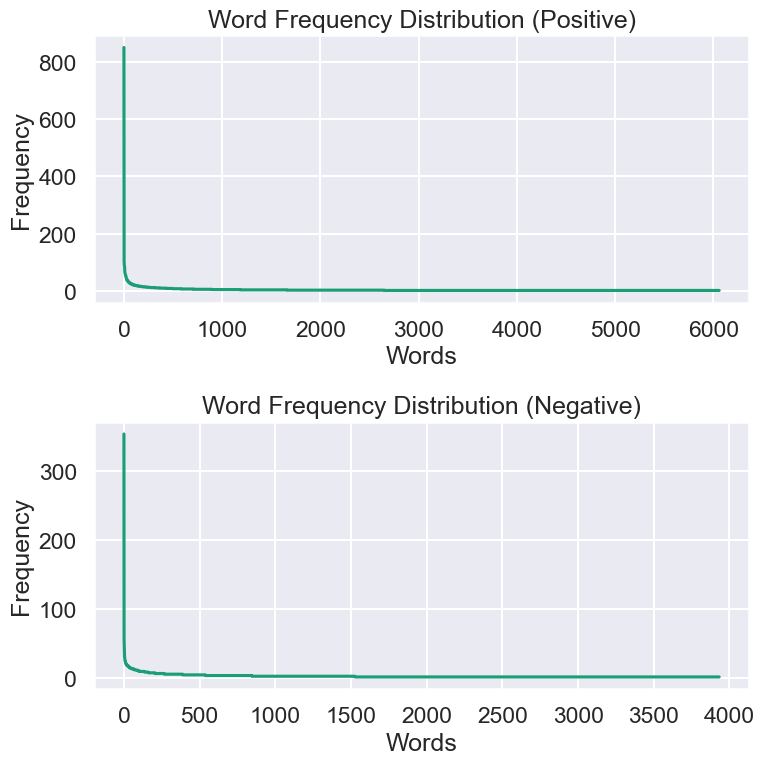

In [24]:
# Combine the two figures 
y_val_pos = [x[1] for x in pos_freq.most_common()]
y_val_neg = [x[1] for x in neg_freq.most_common()]

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(y_val_pos)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")

plt.subplot(2, 1, 2)
plt.plot(y_val_neg)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")

plt.tight_layout()
plt.show()




In [20]:
# Combine the tokenised results 
all_tokens = pos_tokens + neg_tokens
all_freq = nltk.FreqDist(all_tokens)
all_freq.most_common(40)

[('ai', 1205),
 ('chatgpt', 189),
 ('gpt', 136),
 ('openai', 127),
 ('video', 102),
 ('free', 98),
 ('generative', 97),
 ('intelligence', 91),
 ('image', 88),
 ('models', 83),
 ('robot', 82),
 ('text', 76),
 ('prompt', 74),
 ('song', 73),
 ('data', 72),
 ('google', 71),
 ('tool', 69),
 ('suno', 69),
 ('sora', 68),
 ('artificial', 66),
 ('human', 66),
 ('model', 62),
 ('llm', 61),
 ('app', 57),
 ('music', 57),
 ('top', 54),
 ('meta', 53),
 ('tools', 52),
 ('future', 51),
 ('created', 50),
 ('images', 50),
 ('generated', 50),
 ('robotics', 50),
 ('generation', 49),
 ('time', 48),
 ('voice', 48),
 ('agi', 48),
 ('2024', 47),
 ('apple', 46),
 ('chat', 46)]

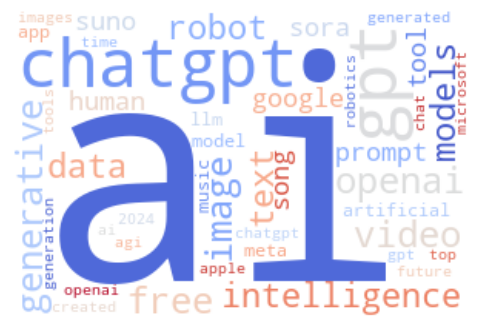

In [133]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


# Word counting 
words = []

for title in all_tokens:
    words += title.split()

word_count = Counter(words).most_common(40)

# Generating word cloud
wordcloud = WordCloud(
             background_color='white',
             repeat=True,
             max_words=200,
             height=200, width=300,
             max_font_size=200, min_font_size=6,
             colormap='coolwarm', prefer_horizontal=0.7).generate_from_frequencies(dict(word_count))

# Display word cloud 
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [99]:
posts_df['Date'] = pd.to_datetime(posts_df['Date'])
posts_df.set_index('Date', inplace=True)

In [100]:
posts_df.drop('title', axis=1, inplace=True)

In [101]:
posts_df = posts_df.resample('B').agg('mean')
posts_df.fillna(0, inplace=True)

In [102]:
posts_df.to_csv('sentiment.csv')

In [103]:
posts_df

,neg,neu,pos,sentiment
Date,,,,
2023-06-15,0.000000,0.936250,0.063750,0.085000
2023-06-16,0.000000,0.906750,0.093250,0.286300
2023-06-19,0.000000,0.832000,0.168000,0.363450
2023-06-20,0.000000,0.741000,0.259000,0.598300
2023-06-21,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...
2024-04-24,0.046682,0.866585,0.086726,0.060144
2024-04-25,0.055103,0.862667,0.082233,0.047652
2024-04-26,0.067031,0.843401,0.085299,0.030889
